In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the CSV data
df = pd.read_csv('/content/drive/MyDrive/startup_data.csv')

# Define a condition to create a binary classification problem
threshold_funding = 100000000  # Example threshold amount

# Create a binary target variable based on the condition
df['Target'] = (df['Funding Amount in $'] > threshold_funding).astype(int)

# Separate features (X) and target variable (y)
X = df.drop(columns=['Target', 'Funding Amount in $'])  # Exclude target and funding amount columns
y = df['Target']

# One-hot encode categorical variables in features (X)
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Instantiate the SMOTE object with k_neighbors
smote = SMOTE(k_neighbors=10)  # Adjust the value of k_neighbors as needed

# Generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a classifier (Random Forest as an example)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      1.00      0.88        46
           1       1.00      0.14      0.25        14

    accuracy                           0.80        60
   macro avg       0.90      0.57      0.57        60
weighted avg       0.84      0.80      0.74        60



In [19]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

# Assuming you have loaded your data and preprocessed it as needed
# For demonstration, let's create a sample DataFrame similar to your startup data
data = {
    'Company': ['Urban Company', 'Classplus'],
    'City': ['Gurgaon', 'Noida'],
    'Funding Round': [12, 10],
    'No. of Investors': [16, 20],
    'Results': [1, 0]  # Assuming 'Results' column for binary classification
}
df = pd.DataFrame(data)

# Separate features (X) and target variable (y)
X = df.drop(columns=['Results'])
y = df['Results']

# Encode categorical variables using one-hot encoding
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Instantiate the SMOTE object with k_neighbors
smote = SMOTE(k_neighbors=1)  # Adjust the value of k_neighbors as needed

# Generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Concatenate resampled features and target variable
resampled_data = pd.concat([pd.DataFrame(X_resampled.toarray(), columns=encoder.get_feature_names_out(X.columns)), pd.Series(y_resampled, name="Results")], axis=1)

# Display the balanced class distribution
print("\nBalanced Class Distribution after SMOTE:")
print(resampled_data)



Balanced Class Distribution after SMOTE:
   Company_Classplus  Company_Urban Company  City_Gurgaon  City_Noida  \
0                0.0                    1.0           1.0         0.0   
1                1.0                    0.0           0.0         1.0   

   Funding Round_10  Funding Round_12  No. of Investors_16  \
0               0.0               1.0                  1.0   
1               1.0               0.0                  0.0   

   No. of Investors_20  Results  
0                  0.0        1  
1                  1.0        0  


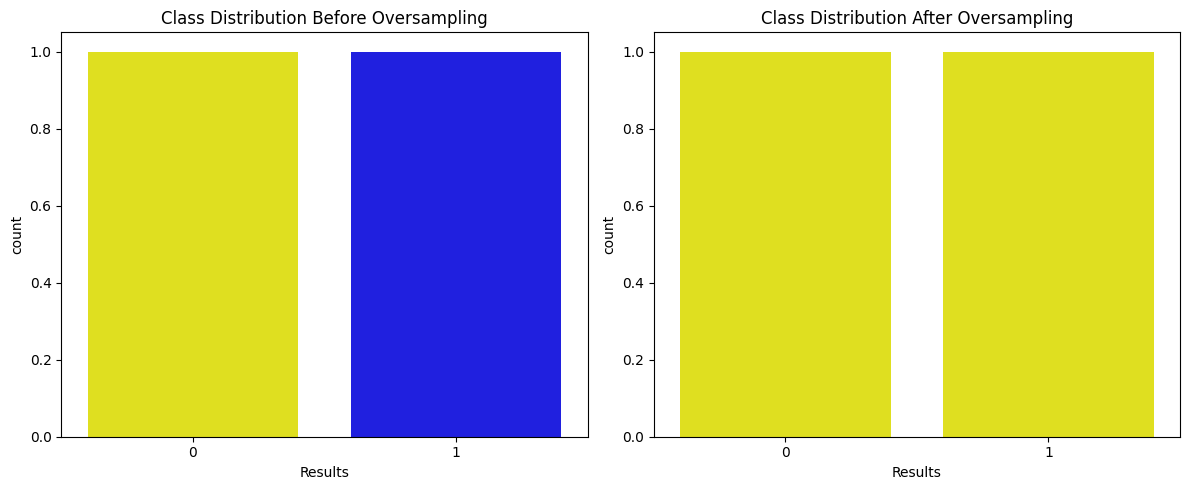

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for before and after oversampling
colors_before = ["yellow", "blue"]  # Colors for before oversampling
colors_after = ["yellow", "yellow"]  # Colors for after oversampling

# Plotting the class distribution before and after oversampling
plt.figure(figsize=(12, 5))

# Plotting the class distribution before oversampling
plt.subplot(1, 2, 1)
sns.countplot(data=resampled_data, x='Results', hue='Results', palette=colors_before, legend=False)
plt.title('Class Distribution Before Oversampling')

# Plotting the class distribution after oversampling
plt.subplot(1, 2, 2)
sns.countplot(data=resampled_data, x='Results', hue='Results', palette=colors_after, legend=False)
plt.title('Class Distribution After Oversampling')

plt.tight_layout()
plt.show()
